In [29]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [35]:
labels = np.load('labels.npy', allow_pickle=True)
predictions = np.load('predictions.npy', allow_pickle=True)

In [10]:
from transformers import BartForSequenceClassification
model = BartForSequenceClassification.from_pretrained('/Utilisateurs/pchau/pretrain_bart/finetune-classification/output', 
                                                        local_files_only=True, 
                                                        num_labels=16)
id2label = model.config.id2label

/Utilisateurs/pchau/.conda/envs/classify/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'advertisement', '1': 'budget', '2': 'email', '3': 'file_folder', '4': 'form', '5': 'handwritten', '6': 'invoice', '7': 'letter', '8': 'memo', '9': 'news_article', '10': 'presentation', '11': 'publication', '12': 'questionnaire', '13': 'report', '14': 'resume', '15': 'specification'}. The number of labels wil be overwritten to 16.


In [36]:
# Convert label IDs to label names
labels_true = [id2label[id] for id in labels]
labels_pred = [id2label[id] for id in predictions]

In [37]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(labels_true, labels_pred, labels=list(id2label.values()))

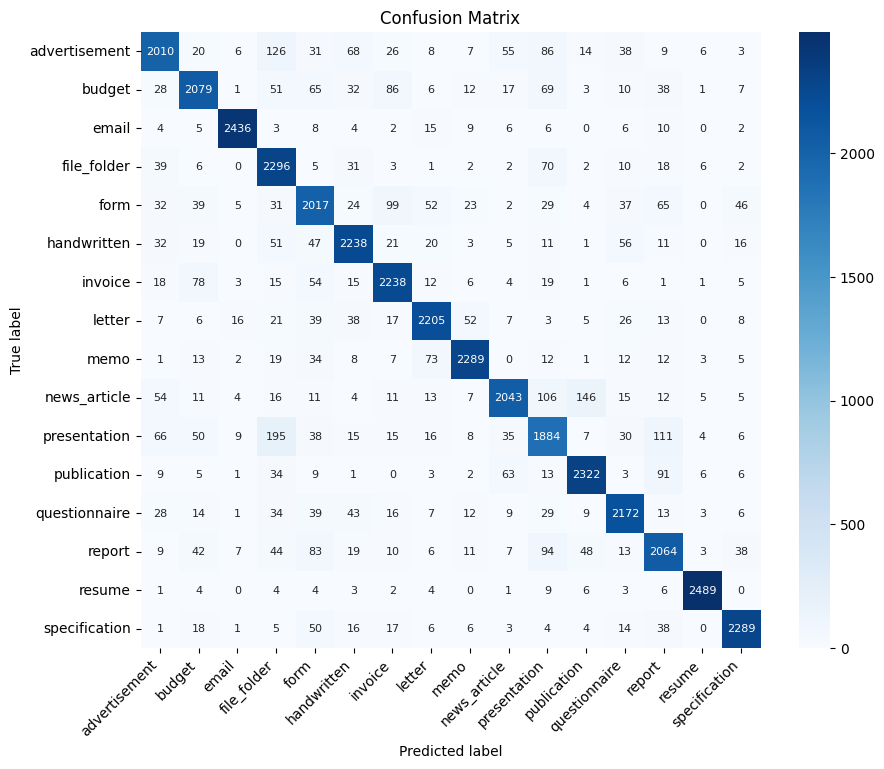

In [38]:
# Create the confusion matrix plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(id2label.values()), yticklabels=list(id2label.values()), cbar=True, annot_kws={"size": 8})
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()